### Dataset description
**Source**: Google Analytics hit (pageview) level data, by date and by article title.

**Field descriptions**:
- Date - year, month, day of hit.
- Page Title - article title that was viewed by user
- Age - age of user that visited the site
- Gender - gender of user that visited the site
- Source/Medium - the referral source of the hit or the website that the user was on before visiting whowhatwear.com
- Pageviews - a hit of a url on our site that is being tracked by theAnalytics tracking code.
- Unique Pageviews - represents the number of sessions during which that page was viewed one or more times.

### Step 1: Load and Clean Source-Data

In [1]:
# Import the relevant modules
import pandas as pd
from pandas import DataFrame
import numpy as np
import json

In [2]:
# Import data
customer_df = pd.DataFrame(pd.read_csv('intern_assessment_ds.csv', encoding='unicode_escape'))
customer_df.head(2)

,Date,Page Title,Age,Gender,Source / Medium,Pageviews,Unique Pageviews,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,20190606,Chrissy Teigen Wore the Pleated-Jean Trend | W...,35-44,female,m.facebook.com / referral,35541,31670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20190606,Chrissy Teigen Wore the Pleated-Jean Trend | W...,25-34,female,m.facebook.com / referral,29730,26236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**First Issue**: In the original version of the file, the error "UnicodeDecodeError: 'utf8' codec can't decode byte 0xa5 in position 0: invalid start byte" appeared. To resolve this issue, the encoding, 'unicode_escape', was specified to produce an output that is suitable as raw Unicode literal in Python source code. Additionally, the 'utf8' error can also be resolved by openning the original csv file was opened in Excel/Numbers, then re-exported out as a CSV with 'utf8' encoding specified. 

**Second Issue**: When imported, it becomes apparent that the are several uncessessary columns full of NaN objects and unnamed. Since these columns are also not referenced in the data description, it will be assumed that these columns can be dropped without interfering with further analysis. 

In [3]:
# Drop unnecessary columns
customer_df = customer_df.drop(columns=['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
                                       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'])
customer_df.head(2)

,Date,Page Title,Age,Gender,Source / Medium,Pageviews,Unique Pageviews
0,20190606,Chrissy Teigen Wore the Pleated-Jean Trend | W...,35-44,female,m.facebook.com / referral,35541,31670
1,20190606,Chrissy Teigen Wore the Pleated-Jean Trend | W...,25-34,female,m.facebook.com / referral,29730,26236


In [4]:
# Assess dataset
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32755 entries, 0 to 32754
Data columns (total 7 columns):
Date                32755 non-null int64
Page Title          32755 non-null object
Age                 32755 non-null object
Gender              32755 non-null object
Source / Medium     32755 non-null object
Pageviews           32755 non-null int64
Unique Pageviews    32755 non-null int64
dtypes: int64(3), object(4)
memory usage: 1.7+ MB


*Observations*: All columns appear to have the same length of non-null objects, but null-values will be dropped as a precaution.

In [5]:
# Drop null values
customer_df = customer_df.dropna()

In [6]:
# Number of entries in dataset
print(customer_df.shape)

(32755, 7)


In [7]:
# Define date timeframe
print(customer_df.sort_values(by='Date', ascending=True)['Date'].head(1))
customer_df.sort_values(by='Date', ascending=True)['Date'].tail(1)

22530    20190601
Name: Date, dtype: int64


14392    20190630
Name: Date, dtype: int64

In [8]:
# Define genders in dataset
np.unique(customer_df.Gender)

array(['female', 'male'], dtype=object)

*Observations*: This dataset is for June 1 to 30 in 2019, and the audience contains both male and female genders.

## Question 1: Who is our audience? What demographic segment represents our core audience?

To answer this question, we can lean on the two audience descriptor columns provided from this dataset: *Age	and Gender*. We can create a sub-dataframe that groups these groups by gender, then by age, and shows the number of counts per group in order to assess which demographic is most dominant.

#### Step 1: Is there a difference between the number of female and male audience members of WWW?

In [9]:
# Create dataframe audience
audience = customer_df[['Age', 'Gender']]
audience.head(1)

,Age,Gender
0,35-44,female


In [10]:
# Add a counts column
audience['Count'] = 1
audience.head(1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Age,Gender,Count
0,35-44,female,1


In [11]:
# Separate males and females

# Male 
male_audience = audience.loc[audience['Gender'] == 'male']
length_male = len(male_audience)
print(male_audience.head(2))

# Female
female_audience = audience.loc[audience['Gender'] == 'female']
length_female = len(female_audience)
print(female_audience.head(2))

       Age Gender  Count
124    65+   male      1
170  45-54   male      1
     Age  Gender  Count
0  35-44  female      1
1  25-34  female      1


*Visualize*

In [12]:
# Import necessary modules
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams

In [13]:
# Create a general function for percent
def calculate_percentage(val, total):
    return round((val / total)*100, 3)

# Test output
print(calculate_percentage(30, 100))

30.0


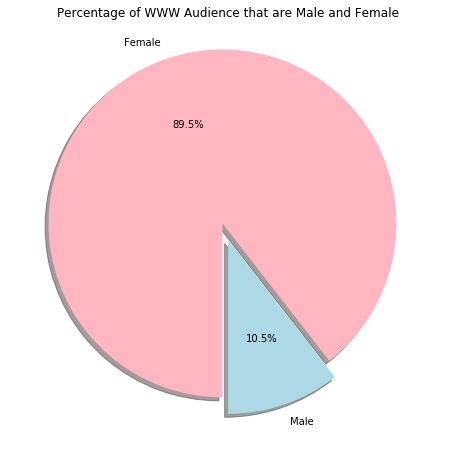

The total number of males in the WWW audience dataset is:  3445
The total number of females in the WWW audience dataset is:  29310


In [14]:
# Define total audience
total_audience = len(audience)
audience_list = [length_male, length_female]

# Calculate percentage male and female
percent_male = calculate_percentage(length_male, total_audience)
percent_female = calculate_percentage(length_female, total_audience)

# Create pie chart for visualization
labels = ['Male', 'Female']
colors = ['lightblue','lightpink'] 
rcParams['figure.figsize'] = 8,8
explode = (0, 0.1) # only "explode" 'Female'

# Plot
plt.pie(audience_list, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of WWW Audience that are Male and Female')
plt.savefig('wwwaudience.png', dpi=300)
plt.show()

print('The total number of males in the WWW audience dataset is: ', len(male_audience))
print('The total number of females in the WWW audience dataset is: ', len(female_audience))

*Observations*: Clearly, at just under 90% of the total audience population of WWW, females are the prodominant viewers. Therefore, it is safe to assume that at least one age group within the female audience population represents the core of WWW's audience.

In [15]:
# Drop the gender column from the female dataset
female_audience_counts = female_audience.drop(columns='Gender')
female_audience_counts.head(1)

,Age,Count
0,35-44,1


In [16]:
# Group the dataset by Age and sort by Count
female_audience_counts = female_audience_counts.groupby('Age').sum().sort_values(by='Count',ascending=False).reset_index()
female_audience_counts

,Age,Count
0,25-34,9183
1,35-44,6146
2,45-54,5222
3,55-64,4710
4,65+,2420
5,18-24,1629


*Observations*: It appears that the main demographic of the WWW audience is women within the ages of 25-34, followed by women between 35-44 and 45-54. 

*Visualize*

In [17]:
# Import necessary modules
import seaborn as sns

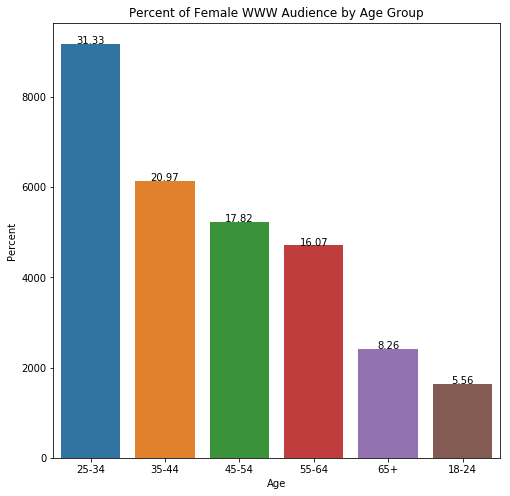

In [18]:
# Plot counts and show percentages
ax = sns.barplot(x='Age', y='Count', data=female_audience_counts)

# Percentages added from source code:
# https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn/31754317
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format( (height/sum(female_audience_counts.Count)) * 100),
            ha="center")  
ax.set(title='Percent of Female WWW Audience by Age Group', ylabel='Percent')
plt.savefig('wwwcoreaudience.png', dpi=300)
plt.show()

### Conclusion to Question 1: 
At **89.5%** of the total audience sample size within the dataset, **women make up vast majority of WWW followers**. Of that, three demographics make up the 'core' or over 50% of the WWW audience population:
1. Women ages **25-34** make up the core demographic of (**~28% of the total**)
2. Women ages **35-44** (with **~19% of the total**)
3. Women ages **45-54** (with **~16% of the total**)
Further analyses can be performed to quantify which group provides WWW with the most economic gain, in terms of immediate and lifetime-customer values. 

## Question 2: What content resonates with her? What are the themes and frames that drive engagement?

For the sake of this assessment, only the top audience demographic, **women ages 25-24**, will be analyzed in order to answer the questions above. Within the dataset, the two most applicable columns with content information are *Pageviews, Unique Pageviews, and Page Title*. It will also be assumed that an article with the most unique page views, meaning more sessions by readers, will be content that resonates the most with the core audience.

In [38]:
customer_df.head(2)

,Date,Page Title,Age,Gender,Source / Medium,Pageviews,Unique Pageviews
0,20190606,Chrissy Teigen Wore the Pleated-Jean Trend | W...,35-44,female,m.facebook.com / referral,35541,31670
1,20190606,Chrissy Teigen Wore the Pleated-Jean Trend | W...,25-34,female,m.facebook.com / referral,29730,26236


In [39]:
# Create a dataframe with the top audience demographic selected

# Select 25-34 age group
core_audience = customer_df.loc[customer_df['Age'] == '25-34']

# Select females in dataset
core_audience = core_audience.loc[core_audience['Gender'] == 'female']

# Test output
np.unique(core_audience.Age), np.unique(core_audience.Gender)

(array(['25-34'], dtype=object), array(['female'], dtype=object))

In [40]:
# Drop unnecessary columns
content_df = core_audience.drop(columns=['Age', 'Gender', 'Source / Medium'])
content_df.head()

,Date,Page Title,Pageviews,Unique Pageviews
1,20190606,Chrissy Teigen Wore the Pleated-Jean Trend | W...,29730,26236
4,20190608,Chrissy Teigen Wore the Pleated-Jean Trend | W...,18157,15970
5,20190620,The Best Miami Summer Trends for Under $100 | ...,16874,14081
9,20190602,These Stylish Summer Outfits Are Surprisingly ...,15429,13141
11,20190604,The 19 Best Shopping Picks for May 2019 | Who ...,14276,11435


*Convert Date to Datetime Object*

In [41]:
# Import necessary modules
from datetime import datetime

In [42]:
# Convert Date integers to datetime
content_df['Date'] = content_df['Date'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d'))
content_df.head(2)

,Date,Page Title,Pageviews,Unique Pageviews
1,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend | W...,29730,26236
4,2019-06-08,Chrissy Teigen Wore the Pleated-Jean Trend | W...,18157,15970


In [43]:
# Assess the contents of the Page Title column
content_df.iloc[0]['Page Title'], content_df.iloc[1]['Page Title'], content_df.iloc[2]['Page Title']

('Chrissy Teigen Wore the Pleated-Jean Trend | Who What Wear',
 'Chrissy Teigen Wore the Pleated-Jean Trend | Who What Wear',
 'The Best Miami Summer Trends for Under $100 | Who What Wear')

*Observations*: Based off of the contents of the Page Title column, there appear to be duplicate contents as well as various subject matters. In order to establish which components of the Page Title column lead to the most engagement, 

In [44]:
# Drop date column
content_df = content_df.drop(columns='Date')
content_df.head(2)

,Page Title,Pageviews,Unique Pageviews
1,Chrissy Teigen Wore the Pleated-Jean Trend | W...,29730,26236
4,Chrissy Teigen Wore the Pleated-Jean Trend | W...,18157,15970


In [46]:
# Group dataframe by Page Title
content_df = content_df.groupby('Page Title').sum().sort_values(
                                        by='Unique Pageviews',ascending=False).reset_index()
len(content_df)

1004

*What do the top 20% of articles (~200) have in common? What characteristics? Content?*

In [51]:
# View top 20 
content_df['Page Title'][0:30]

0     Chrissy Teigen Wore the Pleated-Jean Trend | W...
1     The Best Miami Summer Trends for Under $100 | ...
2                    Summer Beauty Buys | Who What Wear
3                 Summer Wedding Makeup | Who What Wear
4     These Stylish Summer Outfits Are Surprisingly ...
5     We Tried On the 13 Biggest Summer Trends at Za...
6     Affordable Summer Fashion Trends From a Chic H...
7     How to Become a Morning Person | The Latest Fi...
8      How to Wear Crop Tops With Jeans | Who What Wear
9     11 of the Best Nontoxic Beauty ProductsÛÓand ...
10    Celebrity Style and Fashion Trend Coverage | W...
11    5 Summer Dress Trends That Will Be Everywhere ...
12           How to Become a Morning Person | TheThirty
13    Jennifer Lopez Wore 2019's Biggest Grandma Tre...
14    7 Huge Fashion Trends You Can Find Way Cheaper...
15    ZoÌÇ Kravitz Wore Bike Shorts to Her Paris Wed...
16    7 Outdated Sandal Trends We're Splitting Up Wi...
17    The 19 Best Shopping Picks for May 2019 | 

*Observations*: 
1. It looks like the source of the article is listed after the ' | ' symbol. 
2. Some articles appear to share a "How to" content purpose.
3. Some articles focus on "Trend" 
4. Some articles focus on "Best" 
5. Some articles focus on "Celebrity"
6. Some articles focus on "Wore", which relates to Celebrity/Influencer
7. Some articles focus on "Cheap"
8. Some articles focus on "Shop"/"Shopping"
9. Some articles focus on "How to"
10. Some articles focus on "Buy"
11. Some articles focus on "Summer"
12. Some articles focus on "Most"
13. Some articles focus on "Fashion"

For the sake of time, the top 200 articles will be assessed and groubed by the characteristics listed above. 

In [76]:
# Select top 200
top_200 = content_df.iloc[0:200]
len(top_200)

200

In [77]:
# Rename Page Title Column for easy queries
top_200.columns = ['PageTitle', 'Pageviews', 'Unique Pageviews']

In [78]:
# Import necessary modules for insertions with SQL 
import pandasql as ps

In [85]:
# Query to find out the number of articles based on the conditions above
query = """
select

  case 
    when PageTitle like '%Trend%' then 'Trends'
    when PageTitle like '%Best%' then 'BestOf'
    when PageTitle like '%Celeb%' then 'Celebrity'
    when PageTitle like '%Wore%' then 'Celebrity'
    when PageTitle like '%Cheap%' then 'Affordable'
    when PageTitle like '%Affordable%' then 'Affordable'
    when PageTitle like '%Shop%' then 'Shop'
    when PageTitle like '%How%' then 'HowTo'
    when PageTitle like '%Buy%' then 'Buy'
    when PageTitle like '%Summer%' then 'Summer'
    when PageTitle like '%Most%' then 'Most'
    when PageTitle like '%Fashion%' then 'Fashion'
    else 'NotSpecified'
    
  end as PageTitle
  
from top_200"""

In [86]:
# Add modified 11 categories to top_200
top_200['Top 11 Categories'] = ps.sqldf(query)
top_200.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PageTitle,Pageviews,Unique Pageviews,Top 13 Categories,Top 11 Categories
0,Chrissy Teigen Wore the Pleated-Jean Trend | W...,142141,124995,Trends,Trends
1,The Best Miami Summer Trends for Under $100 | ...,109396,93411,Trends,Trends
2,Summer Beauty Buys | Who What Wear,97386,87388,Buy,Buy
3,Summer Wedding Makeup | Who What Wear,69361,62773,Summer,Summer
4,These Stylish Summer Outfits Are Surprisingly ...,71656,61164,Affordable,Affordable


*Visualize*

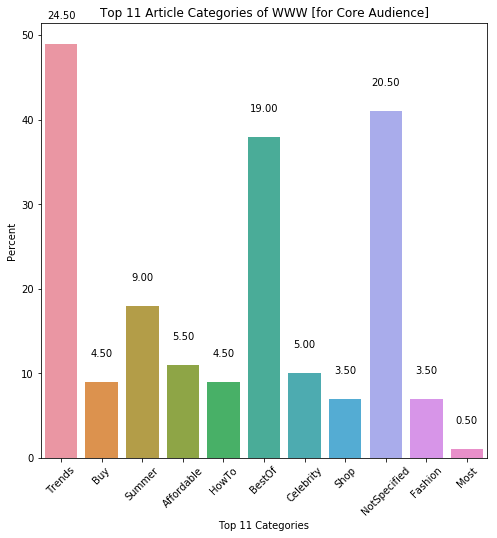

In [89]:
# Plot counts and show percentages
ax = sns.countplot(x='Top 11 Categories', data=top_200)

# Percentages added from source code:
# https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn/31754317
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format( (height/len(top_200['Top 13 Categories'])) * 100),
            ha="center")  
ax.set(title='Top 11 Article Categories of WWW [for Core Audience]', ylabel='Percent')
plt.xticks(rotation=45)
plt.savefig('top11categories.png', dpi=300)
plt.show()

### Conclusion to Question 2: 
While this is a minimal analysis of the data provided within each article, the following generalized trends can be deduced from this analysis of the top 200 articles within the dataset: 
1. Articles pretaining to **Trend** have the most Unique Page Views (**~25% of the total**)
2. Articles pretaining to **NotSpecified** have the second most Unique Page Views (**~20% of the total**)
        *Note: The 'NotSpecified' category showing up as one of the top categories is a 'non-conclusion' since it indicates that the SQL query was not specific enough and should add more categories for a more accurate result. 
3. Articles pretaining to **Best Of** have the third most Unique Page Views (**~19% of the total**)
Further analyses can be performed to accurately select which categories should be used within the SQL query as well as incorporate the differences between the sources of the articles.

## Question 3: What are the channels that are driving engagement? Which traffic sources should we lean into, which traffic sources should we deprioritize?

In order to assess which channels drive engagement, the top columns within the dataset provided would be: *Date, Source/Medium, Pageviews, and Unique Pageviews*. Additionally, since the core audience demographic has been identified, the success and lapse in success of these channels can be compared and contrasted between the age and gender demographics. However, For the sake of this assessment, only the top audience demographic, **women ages 25-24**, will be analyzed in order to answer the questions above.

In [27]:
core_audience.head(2)

,Date,Page Title,Age,Gender,Source / Medium,Pageviews,Unique Pageviews
1,20190606,Chrissy Teigen Wore the Pleated-Jean Trend | W...,25-34,female,m.facebook.com / referral,29730,26236
4,20190608,Chrissy Teigen Wore the Pleated-Jean Trend | W...,25-34,female,m.facebook.com / referral,18157,15970


In [28]:
# Create a dataframe for engagement
engagement_df = core_audience[['Source / Medium', 'Pageviews', 'Unique Pageviews']]
engagement_df.head(2)

,Source / Medium,Pageviews,Unique Pageviews
1,m.facebook.com / referral,29730,26236
4,m.facebook.com / referral,18157,15970


In [29]:
# Group data by Source/Medium, which Pageviews and Unqiue Pageviews summed
engagement_df = engagement_df.groupby('Source / Medium').sum().sort_values(
                                        by='Unique Pageviews',ascending=False).reset_index()
len(engagement_df)

61

In [30]:
# Top 10% Mediums for Engagement / 'Unique Page Views'
engagement_df.head(6)

,Source / Medium,Pageviews,Unique Pageviews
0,m.facebook.com / referral,1353721,1153496
1,google / organic,855424,670559
2,newsletter / email,673540,544691
3,tpc.googlesyndication.com / referral,306562,244204
4,www-whowhatwear-com.cdn.ampproject.org / referral,139332,110003
5,(direct) / (none),126560,99558


In [31]:
# Bottom 10% Mediums for Engagement / 'Unique Page Views'
engagement_df.tail(10)

,Source / Medium,Pageviews,Unique Pageviews
51,makeup.com / facebook,128,109
52,l.instagram.com / referral,122,100
53,reddit.com / referral,100,82
54,brides / facebook,90,81
55,vox.com / referral,106,77
56,facebook / social,98,74
57,purewow / facebook,81,73
58,dash hudson / instagram-owned,71,63
59,app.asana.com / referral,21,18
60,social-pinterest-button / social,14,11


*Visualize*

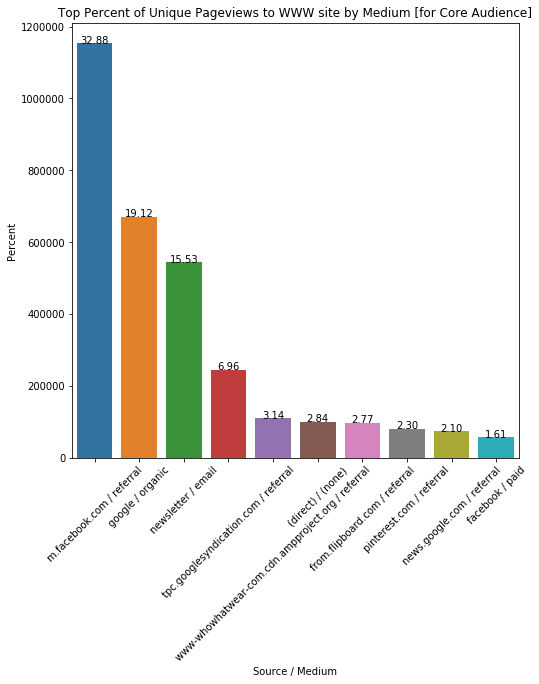

In [32]:
# Plot counts and show percentages
ax = sns.barplot(x='Source / Medium', y='Unique Pageviews', data=engagement_df[0:10])

# Percentages added from source code:
# https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn/31754317
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format( (height/sum(engagement_df['Unique Pageviews'])) * 100),
            ha="center")  
ax.set(title='Top Percent of Unique Pageviews to WWW site by Medium [for Core Audience]', ylabel='Percent')
plt.xticks(rotation=45)
plt.savefig('topsources.png', dpi=300)
plt.show()

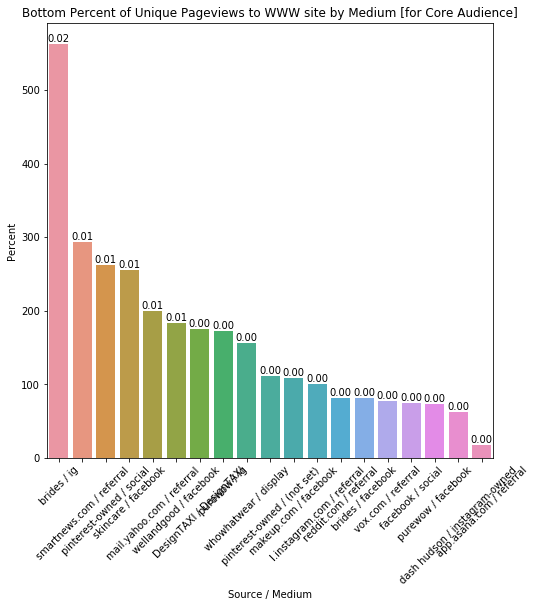

In [33]:
# Plot counts and show percentages
ax = sns.barplot(x='Source / Medium', y='Unique Pageviews', data=engagement_df[-20:-1])

# Percentages added from source code:
# https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn/31754317
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format( (height/sum(engagement_df['Unique Pageviews'])) * 100),
            ha="center")  
ax.set(title='Bottom Percent of Unique Pageviews to WWW site by Medium [for Core Audience]', ylabel='Percent')
plt.xticks(rotation=45)
plt.savefig('bottomsources.png', dpi=300)
plt.show()

### Conclusion to Question 3: 
The **Top 4 of Channels that are driving user engagement, based on Unique Pageviews of the Core Audience**:
1. m.facebook.com / referral (*~33% of the total Unique Pageviews*)
2. google / organic	(*~19% of the total Unique Pageviews*)
3. newsletter / email (*~15% of the total Unique Pageviews*)
4. tpc.googlesyndication.com / referral (*~7% of the total Unique Pageviews*)

These sources account for **more than 74% of user engagement** (based on Unique Pageviews), and should be prioritized for future engagement of the Core Audience (*women ages 25-34*). As seen in the graph, the percent of Unique Pageviews by Source drastically decreases. The financial impact of each fraction of a percent can thus be quantified, and any channel falling below the line of profit should be deprioritized. The lowest ranking of these channels include:

- makeup.com / facebook (*~0% of the total Unique Pageviews*)
- instagram.com / referral	(*~0% of the total Unique Pageviews*)
- reddit.com / referral	(*~0% of the total Unique Pageviews*)
- brides / facebook	(*~0% of the total Unique Pageviews*)
- vox.com / referral (*~0% of the total Unique Pageviews*)
- facebook / social	(*~0% of the total Unique Pageviews*)
- purewow / facebook (*~0% of the total Unique Pageviews*)
- dash hudson / instagram-owned	(*~0% of the total Unique Pageviews*)
- app.asana.com / referral	(*~0% of the total Unique Pageviews*)
- social-pinterest-button / social	(*~0% of the total Unique Pageviews*)